In [92]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

%matplotlib inline

pd.options.display.float_format = '{:.3f}'.format


import warnings
warnings.filterwarnings('ignore')


In [20]:
# Util fuction: line seperator
def print_ln():
    print('-' * 80, '\n')


In [21]:

# Loading in the dataset
diabetic_patient_data_orig = pd.read_csv('../resources/diabetic_data.csv')

# Create a working copy
diabetic_patient_data = diabetic_patient_data_orig.copy()

# Exploring the shape and info about the dataset
print('Dataframe Shape: ', diabetic_patient_data.shape)
print_ln()
print("Dataframe Info: \n")
diabetic_patient_data.info()
print_ln()


Dataframe Shape:  (101766, 50)
-------------------------------------------------------------------------------- 

Dataframe Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
n

In [22]:
# DONE
"""
Remove redundant variables
"""

# Inspecting the head of the dataset
diabetic_patient_data.head(5)

# NOTE replace the `?` as `nan`

diabetic_patient_data = diabetic_patient_data.replace('?', np.nan)
diabetic_patient_data['medical_specialty'].replace({np.nan: 'Unknown'}, inplace=True)

# `encounter_id` is redundant for our purpose, so we can drop that as well
diabetic_patient_data = diabetic_patient_data.drop(['encounter_id'], axis=1)

# `patient_nbr` is redundant for our purpose, so we can drop that as well
diabetic_patient_data = diabetic_patient_data.drop(['patient_nbr'], axis=1)

# dropping the `diag` codes as well
diabetic_patient_data = diabetic_patient_data.drop(['diag_1', 'diag_2', 'diag_3'], axis=1)


# diabetic_patient_data.to_csv("../_resources/diabetic_patient_data.csv", sep=',')


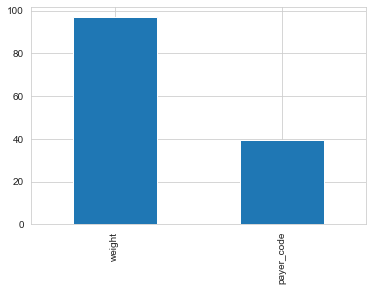

In [33]:

# DONE
"""
Check for missing values and treat them accordingly.
"""

# Analyse the missing values
columns_with_missing_data = round(100 * (diabetic_patient_data.isnull().sum() / len(diabetic_patient_data.index)), 2)
columns_with_missing_data[columns_with_missing_data > 20].plot(kind='bar')
plt.show()


In [23]:

# Three columns have considerable data missing
# - weight
# - payer_code
# - medical_speciality # TODO decide what to do

# We can see that Weight column is almost completely empty and therefore can be dropped
diabetic_patient_data = diabetic_patient_data.drop(['weight'], axis=1)

# `payer_code` is redundant for our purpose, so we can drop that as well
diabetic_patient_data = diabetic_patient_data.drop(['payer_code'], axis=1)



In [24]:

# DONE
"""
Change the variable 'readmitted' to binary type by clubbing the values ">30" and "<30" as "YES".
"""

diabetic_patient_data['readmitted'] = diabetic_patient_data['readmitted'].replace('>30', 'YES')
diabetic_patient_data['readmitted'] = diabetic_patient_data['readmitted'].replace('<30', 'YES')

# diabetic_patient_data.to_csv("../_resources/diabetic_patient_data.csv", sep=',')


In [25]:

# DONE
"""
Remove duplicated rows/columns
"""

# NOTE seems like there is no duplicated data

# deduplicated_patient_data = diabetic_patient_data.drop_duplicates()
# duplicated_data = diabetic_patient_data[diabetic_patient_data.duplicated()]

diabetic_patient_data = diabetic_patient_data.drop_duplicates()




### Checking whether data is imbalanced or not wrt target variable


In [26]:
readmitted_df = diabetic_patient_data["readmitted"].value_counts()

readmitted_df

NO     54861
YES    46902
Name: readmitted, dtype: int64

In [27]:
diabetic_patient_data_rate = readmitted_df[1] / (readmitted_df[1] + readmitted_df[0])
diabetic_patient_data_rate


0.4608944311783261

In [28]:
print("Total readmission Count     = {}".format(readmitted_df[1]))
print("Total Non-readmission Count = {}".format(readmitted_df[0]))
print("Readmission Rate            = {:.2f}%".format(diabetic_patient_data_rate*100))
print_ln()


Total readmission Count     = 46902
Total Non-readmission Count = 54861
Readmission Rate            = 46.09%
-------------------------------------------------------------------------------- 



In [29]:

# Identifying the numerical and categorical features
def type_features(data):
    categorical_features = data.select_dtypes(include=["object"]).columns
    numerical_features = data.select_dtypes(exclude=["object"]).columns
    print("categorical_features :", categorical_features)
    print_ln()
    print("numerical_features:", numerical_features)
    print_ln()
    return categorical_features, numerical_features


diabetic_patient_data_cat_features, diabetic_patient_data_num_features = type_features(diabetic_patient_data)

categorical_features : Index(['race', 'gender', 'age', 'medical_specialty', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')
-------------------------------------------------------------------------------- 

numerical_features: Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object')
------------

In [30]:

# DONE
"""
Perform basic data exploration for some numerical attributes
"""

diabetic_patient_data_num_features = [
    'time_in_hospital',
    'num_lab_procedures',
    'num_procedures',
    'num_medications',
    'number_outpatient',
    'number_emergency',
    'number_inpatient',
    'number_diagnoses']

diabetic_patient_data_num_features_df = diabetic_patient_data[diabetic_patient_data_num_features]

diabetic_patient_data_num_features_df.describe()



time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
count        101763.000          101763.000      101763.000       101763.000   
mean              4.396              43.096           1.340           16.022   
std               2.985              19.675           1.706            8.128   
min               1.000               1.000           0.000            1.000   
25%               2.000              31.000           0.000           10.000   
50%               4.000              44.000           1.000           15.000   
75%               6.000              57.000           2.000           20.000   
max              14.000             132.000           6.000           81.000   

       number_outpatient  number_emergency  number_inpatient  number_diagnoses  
count         101763.000        101763.000        101763.000        101763.000  
mean               0.369             0.198             0.636             7.423  
std                1.267             0.930             1.263             1.934  
min                0.000             0.000             0.000             1.000  
25%                0.000             0.000             0.000             6.000  
50%                0.000             0.000             0.000             8.000  
75%                0.000             0.000             1.000             9.000  
max               42.000            76.000            21.000            16.000

In [14]:
diabetic_patient_data_num_features_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101763 entries, 0 to 101765
Data columns (total 8 columns):
time_in_hospital      101763 non-null int64
num_lab_procedures    101763 non-null int64
num_procedures        101763 non-null int64
num_medications       101763 non-null int64
number_outpatient     101763 non-null int64
number_emergency      101763 non-null int64
number_inpatient      101763 non-null int64
number_diagnoses      101763 non-null int64
dtypes: int64(8)
memory usage: 7.0 MB


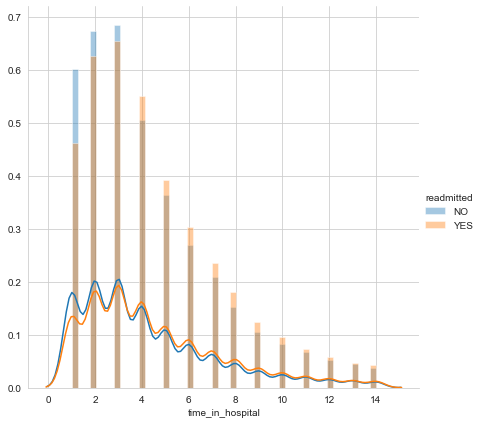

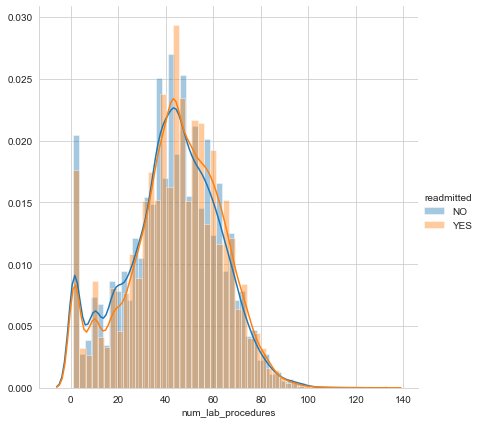

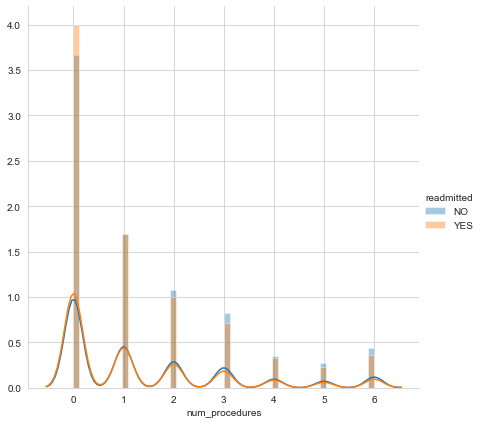

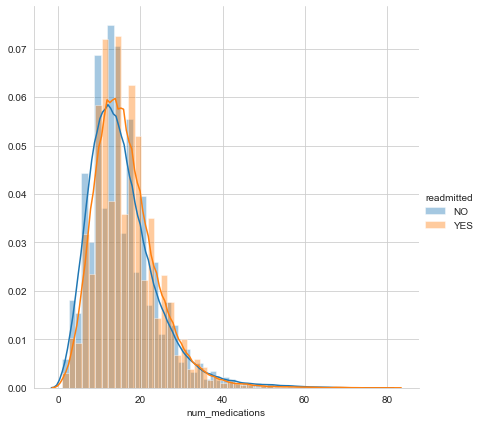

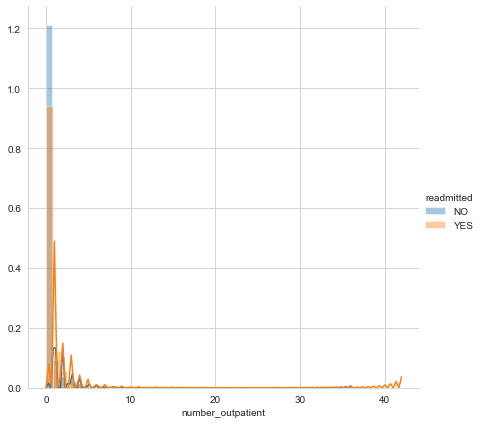

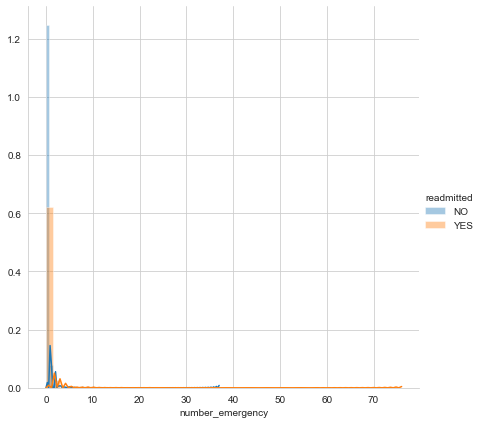

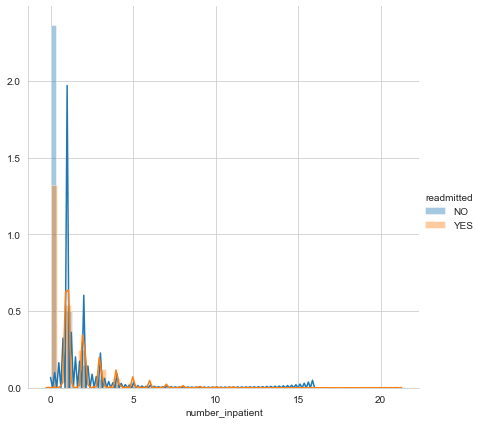

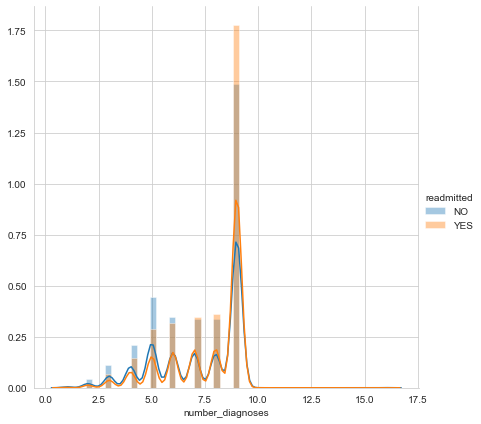

In [15]:

# NOTE Univariate analysis of some numerical attributes

for a_num_feature in diabetic_patient_data_num_features:
    sns.FacetGrid(diabetic_patient_data, hue="readmitted", height=6).map(sns.distplot, a_num_feature).add_legend()
    plt.show()




In [31]:
# NOTE Bivariate analysis of some numerical attributes

diabetic_patient_data_num_features_df = diabetic_patient_data[diabetic_patient_data_num_features]
diabetic_patient_data_num_features_df.head()


time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
0                 1                  41               0                1   
1                 3                  59               0               18   
2                 2                  11               5               13   
3                 2                  44               1               16   
4                 1                  51               0                8   

   number_outpatient  number_emergency  number_inpatient  number_diagnoses  
0                  0                 0                 0                 1  
1                  0                 0                 0                 9  
2                  2                 0                 1                 6  
3                  0                 0                 0                 7  
4                  0                 0                 0                 5

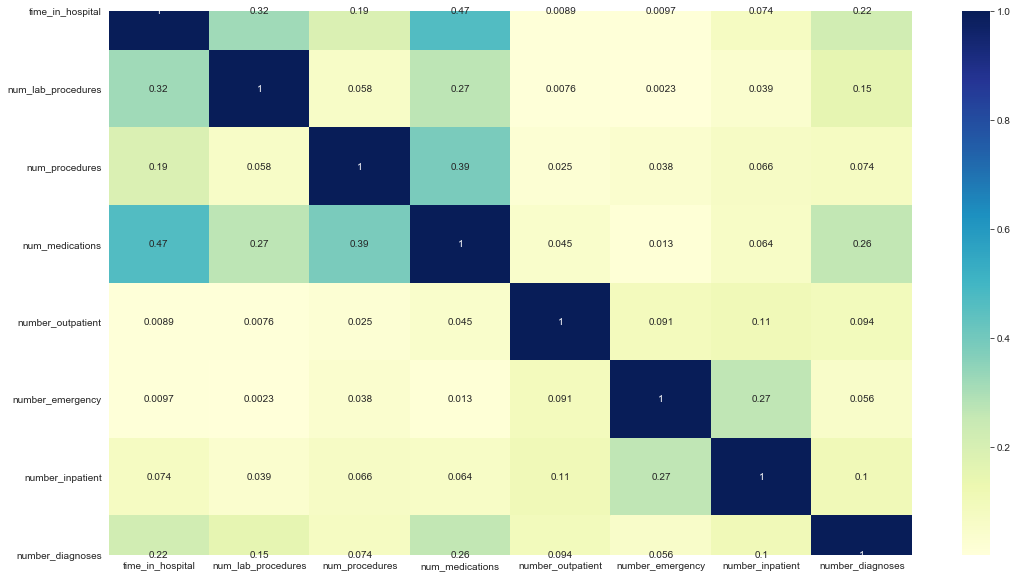

In [17]:

# # Create correlation matrix
corr_matrix = diabetic_patient_data_num_features_df.corr().abs()



# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(18,10))

# heatmap
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()




In [18]:

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.80
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.60)]

print("HIGHLY CORRELATED FEATURES IN DATA SET:{}\n\n{}".format(len(high_corr_features), high_corr_features))


HIGHLY CORRELATED FEATURES IN DATA SET:0

[]


In [32]:

# TODO
"""
Perform basic data exploration for some categorical attributes
"""

diabetic_patient_data_cat_features = [
                                      'admission_type_id',  # NOTE cat-encoded numerical values
#                                       'discharge_disposition_id',  # NOTE cat-encoded numerical values
#                                       'admission_source_id',  # NOTE cat-encoded numerical values
                                      'race',
                                      'gender',
                                      'age',  # TODO find out how to deal with these age ranges
                                      'medical_specialty',  # TODO  find out how to deal with this
                                      'max_glu_serum',  # NOTE has low variance
                                      'A1Cresult',
                                      # diabetes-med-start # TODO these could be dropped or encoded in 0 or 1
                                      'metformin',
                                      'repaglinide',
                                      'nateglinide',
                                      'chlorpropamide',
                                      'glimepiride',
                                      'acetohexamide',
                                      'glipizide',
                                      'glyburide',
                                      'tolbutamide',
                                      'pioglitazone',
                                      'rosiglitazone',
                                      'acarbose',
                                      'miglitol',
                                      'troglitazone',
                                      'tolazamide',
                                      'examide',
                                      'citoglipton',
                                      'insulin',
                                      'glyburide-metformin',
                                      'glipizide-metformin',
                                      'glimepiride-pioglitazone',
                                      'metformin-rosiglitazone',
                                      'metformin-pioglitazone',
                                      # diabetes-med-end
                                      'change',
                                      'diabetesMed',
                                      'readmitted'
                                      ]

for a_cat_feat in diabetic_patient_data_cat_features:
    print(diabetic_patient_data[a_cat_feat].value_counts().count())
    print(diabetic_patient_data[a_cat_feat].value_counts())
    print_ln()


8
1    53988
3    18868
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: admission_type_id, dtype: int64
-------------------------------------------------------------------------------- 

5
Caucasian          76097
AfricanAmerican    19209
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64
-------------------------------------------------------------------------------- 

3
Female             54705
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64
-------------------------------------------------------------------------------- 

10
[70-80)     26068
[60-70)     22483
[50-60)     17255
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1656
[10-20)       690
[0-10)        161
Name: age, dtype: int64
-------------------------------------------------------------------------------- 

73
Unknown                             49948
InternalMedicine                

## Data Preparation

In [33]:
# TODO
"""
Scale numeric attributes 
"""

# scaling the features
from sklearn.preprocessing import scale

for a_num_feat in diabetic_patient_data_num_features:
    diabetic_patient_data[a_num_feat] = pd.DataFrame(scale(diabetic_patient_data[a_num_feat]))
    
diabetic_patient_data.head()
    


race  gender      age  admission_type_id  \
0        Caucasian  Female   [0-10)                  6   
1        Caucasian  Female  [10-20)                  1   
2  AfricanAmerican  Female  [20-30)                  1   
3        Caucasian    Male  [30-40)                  1   
4        Caucasian    Male  [40-50)                  1   

   discharge_disposition_id  admission_source_id  time_in_hospital  \
0                        25                    1            -1.138   
1                         1                    7            -0.468   
2                         1                    7            -0.803   
3                         1                    7            -0.803   
4                         1                    7            -1.138   

          medical_specialty  num_lab_procedures  num_procedures  ...  \
0  Pediatrics-Endocrinology              -0.107          -0.785  ...   
1                   Unknown               0.808          -0.785  ...   
2                   Unknown              -1.631           2.146  ...   
3                   Unknown               0.046          -0.199  ...   
4                   Unknown               0.402          -0.785  ...   

   citoglipton  insulin  glyburide-metformin  glipizide-metformin  \
0           No       No                   No                   No   
1           No       Up                   No                   No   
2           No       No                   No                   No   
3           No       Up                   No                   No   
4           No   Steady                   No                   No   

   glimepiride-pioglitazone metformin-rosiglitazone metformin-pioglitazone  \
0                        No                      No                     No   
1                        No                      No                     No   
2                        No                      No                     No   
3                        No                      No                     No   
4                        No                      No                     No   

  change diabetesMed readmitted  
0     No          No         NO  
1     Ch         Yes        YES  
2     No         Yes         NO  
3     Ch         Yes         NO  
4     Ch         Yes         NO  

[5 rows x 43 columns]

In [34]:
# TODO
"""
Create dummy variables for categorical ones.
"""


for a_cat_feat in diabetic_patient_data_cat_features:
    tmp = pd.get_dummies(diabetic_patient_data[a_cat_feat], prefix=a_cat_feat, drop_first=True)
    diabetic_patient_data = pd.concat([diabetic_patient_data, tmp], axis=1)
    diabetic_patient_data = diabetic_patient_data.drop([a_cat_feat], 1)


diabetic_patient_data.head()

discharge_disposition_id  admission_source_id  time_in_hospital  \
0                        25                    1            -1.138   
1                         1                    7            -0.468   
2                         1                    7            -0.803   
3                         1                    7            -0.803   
4                         1                    7            -1.138   

   num_lab_procedures  num_procedures  num_medications  number_outpatient  \
0              -0.107          -0.785           -1.848             -0.291   
1               0.808          -0.785            0.243             -0.291   
2              -1.631           2.146           -0.372              1.287   
3               0.046          -0.199           -0.003             -0.291   
4               0.402          -0.785           -0.987             -0.291   

   number_emergency  number_inpatient  number_diagnoses  ...  \
0            -0.213            -0.503            -3.322  ...   
1            -0.213            -0.503             0.816  ...   
2            -0.213             0.289            -0.736  ...   
3            -0.213            -0.503            -0.219  ...   
4            -0.213            -0.503            -1.253  ...   

   glyburide-metformin_No  glyburide-metformin_Steady  glyburide-metformin_Up  \
0                       1                           0                       0   
1                       1                           0                       0   
2                       1                           0                       0   
3                       1                           0                       0   
4                       1                           0                       0   

   glipizide-metformin_Steady  glimepiride-pioglitazone_Steady  \
0                           0                                0   
1                           0                                0   
2                           0                                0   
3                           0                                0   
4                           0                                0   

   metformin-rosiglitazone_Steady  metformin-pioglitazone_Steady  change_No  \
0                               0                              0          1   
1                               0                              0          0   
2                               0                              0          1   
3                               0                              0          0   
4                               0                              0          0   

   diabetesMed_Yes  readmitted_YES  
0                0               0  
1                1               1  
2                1               0  
3                1               0  
4                1               0  

[5 rows x 161 columns]

In [12]:
diabetic_patient_data.columns.to_list()

['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'admission_type_id_2',
 'admission_type_id_3',
 'admission_type_id_4',
 'admission_type_id_5',
 'admission_type_id_6',
 'admission_type_id_7',
 'admission_type_id_8',
 'discharge_disposition_id_2',
 'discharge_disposition_id_3',
 'discharge_disposition_id_4',
 'discharge_disposition_id_5',
 'discharge_disposition_id_6',
 'discharge_disposition_id_7',
 'discharge_disposition_id_8',
 'discharge_disposition_id_9',
 'discharge_disposition_id_10',
 'discharge_disposition_id_11',
 'discharge_disposition_id_12',
 'discharge_disposition_id_13',
 'discharge_disposition_id_14',
 'discharge_disposition_id_15',
 'discharge_disposition_id_16',
 'discharge_disposition_id_17',
 'discharge_disposition_id_18',
 'discharge_disposition_id_19',
 'discharge_disposition_id_20',
 'discharge_disposition_id_22',
 'discharge_disposition_id_23',


In [35]:

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)


clean_dataset(diabetic_patient_data)


discharge_disposition_id  admission_source_id  time_in_hospital  \
0                         25.000                1.000            -1.138   
1                          1.000                7.000            -0.468   
2                          1.000                7.000            -0.803   
3                          1.000                7.000            -0.803   
4                          1.000                7.000            -1.138   
...                          ...                  ...               ...   
101758                     1.000                7.000            -0.468   
101759                     1.000                7.000             0.202   
101760                     1.000                7.000            -1.138   
101761                     3.000                7.000             1.877   
101762                     4.000                5.000             0.537   

        num_lab_procedures  num_procedures  num_medications  \
0                   -0.107          -0.785           -1.848   
1                    0.808          -0.785            0.243   
2                   -1.631           2.146           -0.372   
3                    0.046          -0.199           -0.003   
4                    0.402          -0.785           -0.987   
...                    ...             ...              ...   
101758               0.402          -0.785           -0.003   
101759              -0.513           0.973            0.243   
101760               0.503          -0.785           -0.864   
101761               0.097           0.387            0.612   
101762              -1.530           0.973           -1.602   

        number_outpatient  number_emergency  number_inpatient  \
0                  -0.291            -0.213            -0.503   
1                  -0.291            -0.213            -0.503   
2                   1.287            -0.213             0.289   
3                  -0.291            -0.213            -0.503   
4                  -0.291            -0.213            -0.503   
...                   ...               ...               ...   
101758             -0.291            -0.213            -0.503   
101759             -0.291            -0.213             0.289   
101760              0.498            -0.213            -0.503   
101761             -0.291            -0.213             0.289   
101762             -0.291            -0.213            -0.503   

        number_diagnoses  ...  glyburide-metformin_No  \
0                 -3.322  ...                   1.000   
1                  0.816  ...                   1.000   
2                 -0.736  ...                   1.000   
3                 -0.219  ...                   1.000   
4                 -1.253  ...                   1.000   
...                  ...  ...                     ...   
101758             0.816  ...                   1.000   
101759             0.816  ...                   1.000   
101760             2.885  ...                   1.000   
101761             0.816  ...                   1.000   
101762             0.816  ...                   1.000   

        glyburide-metformin_Steady  glyburide-metformin_Up  \
0                            0.000                   0.000   
1                            0.000                   0.000   
2                            0.000                   0.000   
3                            0.000                   0.000   
4                            0.000                   0.000   
...                            ...                     ...   
101758                       0.000                   0.000   
101759                       0.000                   0.000   
101760                       0.000                   0.000   
101761                       0.000                   0.000   
101762                       0.000                   0.000   

        glipizide-metformin_Steady  glimepiride-pioglitazone_Steady  \
0                            0.000                            0.000 

In [20]:
# save the cleansed data 
diabetic_patient_data.to_csv("../_resources/diabetic_patient_data_cleansed.csv", sep=',')


## Model Building

In [36]:

# TODO
"""
Divide your data into training and testing dataset
"""

# # split into train and test
from sklearn.model_selection import train_test_split

y = diabetic_patient_data.loc[:, 'readmitted_YES']
X = diabetic_patient_data.loc[:, diabetic_patient_data.columns != 'readmitted_YES']


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.7,
                                                    test_size=0.3, random_state=100)


In [ ]:
# TODO
"""
Train and compare the performance of at least two machine learning algorithms and decide which one to use for predicting risk of readmission for the patient.
Show important feature for each model is calculated.
"""

# This seems like a classification problem. And I'll evaluate 3 models
# - Decision tree
# - KNN
# - SVM


# And pick ONLY 2

## Decision Tree

In [37]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [54]:
# Confidence level per prediction

dt_pred_prob = dt_default.predict_proba(X_train)
dt_pred_prob

array([[0.62029746, 0.37970254],
       [0.46863469, 0.53136531],
       [0.51388407, 0.48611593],
       ...,
       [0.46863469, 0.53136531],
       [0.57825046, 0.42174954],
       [0.54361294, 0.45638706]])

In [39]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.59      0.67      0.63     16553
           1       0.53      0.44      0.48     13975

    accuracy                           0.57     30528
   macro avg       0.56      0.56      0.55     30528
weighted avg       0.56      0.57      0.56     30528



In [30]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))

[[11494  5059]
 [ 8196  5779]]


In [31]:


# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Putting features
features = list(diabetic_patient_data.columns[1:])
features



/Users/eklavya/.pyenv/versions/miniconda3-latest/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


['num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'admission_type_id_2',
 'admission_type_id_3',
 'admission_type_id_4',
 'admission_type_id_5',
 'admission_type_id_6',
 'admission_type_id_7',
 'admission_type_id_8',
 'discharge_disposition_id_2',
 'discharge_disposition_id_3',
 'discharge_disposition_id_4',
 'discharge_disposition_id_5',
 'discharge_disposition_id_6',
 'discharge_disposition_id_7',
 'discharge_disposition_id_8',
 'discharge_disposition_id_9',
 'discharge_disposition_id_10',
 'discharge_disposition_id_11',
 'discharge_disposition_id_12',
 'discharge_disposition_id_13',
 'discharge_disposition_id_14',
 'discharge_disposition_id_15',
 'discharge_disposition_id_16',
 'discharge_disposition_id_17',
 'discharge_disposition_id_18',
 'discharge_disposition_id_19',
 'discharge_disposition_id_20',
 'discharge_disposition_id_22',
 'discharge_disposition_id_23',
 'discharge_dispositi

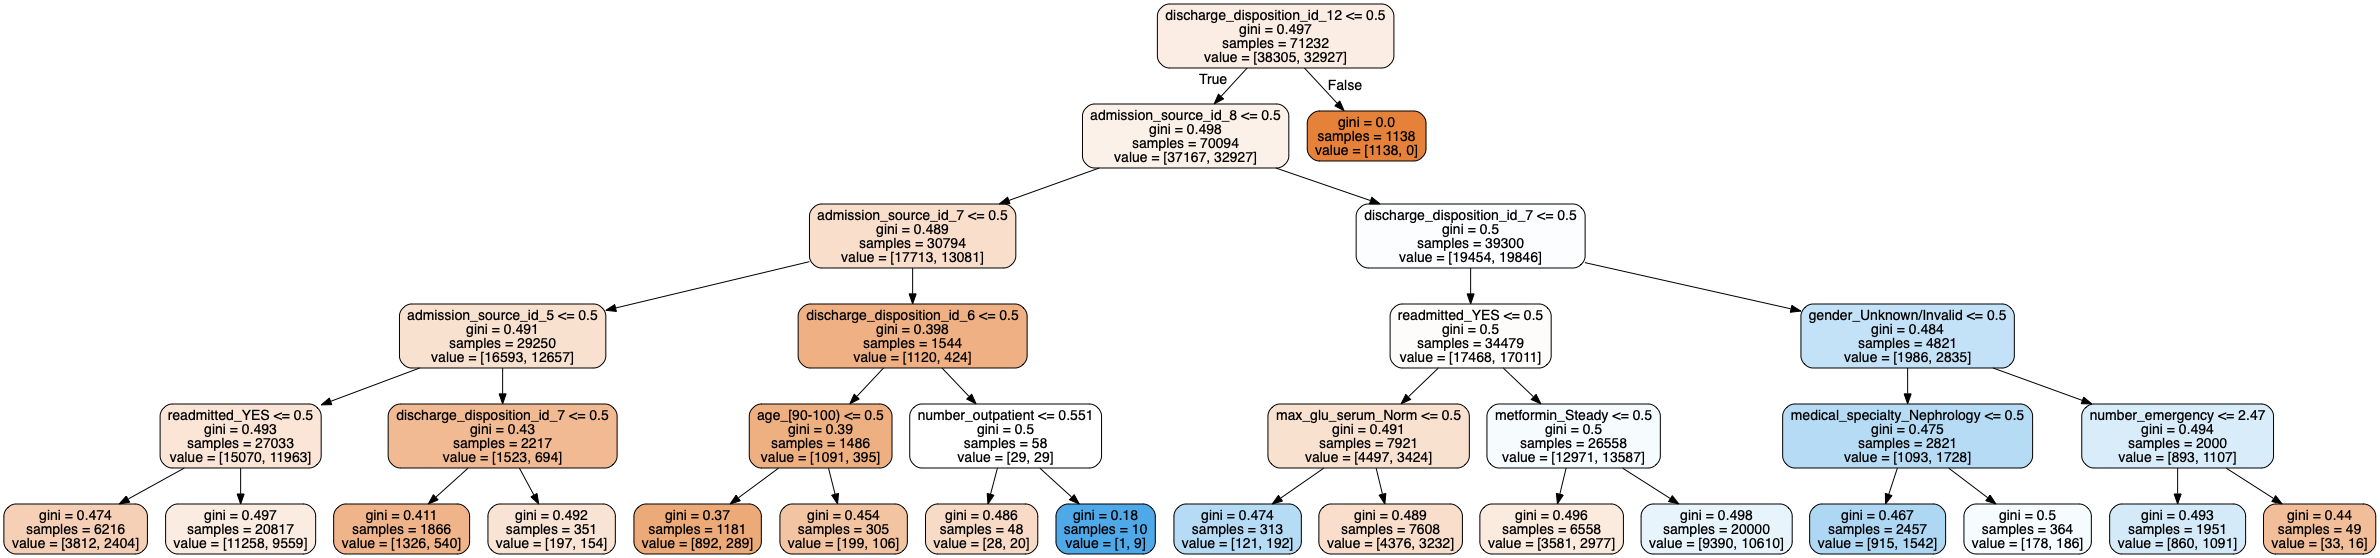

In [33]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


## Tuning Hyperparameter

In [34]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, cv=n_folds,return_train_score=True,scoring="accuracy")

tree.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(1, 40)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='

In [35]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0          0.286         0.089            0.027           0.005   
1          0.324         0.085            0.024           0.003   
2          0.368         0.052            0.022           0.002   
3          0.434         0.061            0.023           0.004   
4          0.593         0.141            0.023           0.003   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               1  {'max_depth': 1}              0.538              0.538   
1               2  {'max_depth': 2}              0.540              0.543   
2               3  {'max_depth': 3}              0.553              0.554   
3               4  {'max_depth': 4}              0.560              0.565   
4               5  {'max_depth': 5}              0.562              0.566   

   split2_test_score  split3_test_score  ...  mean_test_score  std_test_score  \
0              0.538              0.538  ...            0.538           0.000   
1              0.545              0.545  ...            0.543           0.002   
2              0.549              0.550  ...            0.552           0.002   
3              0.561              0.561  ...            0.562           0.002   
4              0.571              0.572  ...            0.567           0.004   

   rank_test_score  split0_train_score  split1_train_score  \
0               38               0.538               0.538   
1               31               0.544               0.543   
2               23               0.557               0.557   
3               16               0.567               0.566   
4               12               0.570               0.569   

   split2_train_score  split3_train_score  split4_train_score  \
0               0.538               0.538               0.538   
1               0.543               0.543               0.543   
2               0.550               0.550               0.557   
3               0.558               0.558               0.566   
4               0.567               0.567               0.569   

   mean_train_score  std_train_score  
0             0.538            0.000  
1             0.543            0.000  
2             0.554            0.004  
3             0.563            0.004  
4             0.568            0.001  

[5 rows x 21 columns]

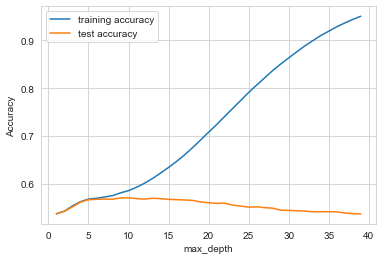

In [36]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning min_samples_leaf

In [37]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, return_train_score=True,
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Tru

In [38]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0          2.103         0.168            0.034           0.006   
1          1.572         0.219            0.028           0.010   
2          1.543         0.220            0.043           0.037   
3          1.153         0.050            0.022           0.001   
4          1.072         0.014            0.023           0.001   

  param_min_samples_leaf                    params  split0_test_score  \
0                      5   {'min_samples_leaf': 5}              0.539   
1                     25  {'min_samples_leaf': 25}              0.551   
2                     45  {'min_samples_leaf': 45}              0.557   
3                     65  {'min_samples_leaf': 65}              0.564   
4                     85  {'min_samples_leaf': 85}              0.569   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0              0.542              0.537              0.536  ...   
1              0.546              0.557              0.549  ...   
2              0.555              0.560              0.563  ...   
3              0.560              0.572              0.568  ...   
4              0.561              0.567              0.566  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0            0.539           0.002               10               0.817   
1            0.551           0.004                9               0.670   
2            0.559           0.003                8               0.640   
3            0.566           0.004                7               0.625   
4            0.566           0.003                6               0.617   

   split1_train_score  split2_train_score  split3_train_score  \
0               0.818               0.817               0.817   
1               0.671               0.670               0.670   
2               0.639               0.639               0.640   
3               0.626               0.624               0.625   
4               0.617               0.616               0.616   

   split4_train_score  mean_train_score  std_train_score  
0               0.816             0.817            0.001  
1               0.669             0.670            0.001  
2               0.639             0.639            0.000  
3               0.625             0.625            0.001  
4               0.615             0.616            0.001  

[5 rows x 21 columns]

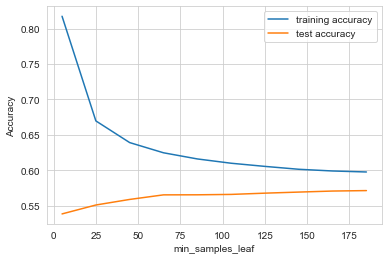

In [39]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning min_samples_split

In [40]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, return_train_score=True,
                   scoring="accuracy")
tree.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_split': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Tr

In [42]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0          2.132         0.394            0.049           0.043   
1          1.634         0.116            0.027           0.007   
2          2.052         0.174            0.030           0.008   
3          1.948         0.184            0.026           0.002   
4          2.084         0.330            0.028           0.009   

  param_min_samples_split                     params  split0_test_score  \
0                       5   {'min_samples_split': 5}              0.540   
1                      25  {'min_samples_split': 25}              0.538   
2                      45  {'min_samples_split': 45}              0.539   
3                      65  {'min_samples_split': 65}              0.543   
4                      85  {'min_samples_split': 85}              0.551   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0              0.532              0.541              0.535  ...   
1              0.538              0.542              0.542  ...   
2              0.541              0.545              0.541  ...   
3              0.545              0.549              0.547  ...   
4              0.547              0.550              0.549  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0            0.537           0.003               10               0.950   
1            0.541           0.003                9               0.785   
2            0.543           0.003                8               0.733   
3            0.547           0.002                7               0.704   
4            0.550           0.002                6               0.687   

   split1_train_score  split2_train_score  split3_train_score  \
0               0.951               0.951               0.950   
1               0.785               0.787               0.786   
2               0.732               0.732               0.735   
3               0.705               0.705               0.706   
4               0.686               0.688               0.687   

   split4_train_score  mean_train_score  std_train_score  
0               0.951             0.951            0.001  
1               0.785             0.785            0.001  
2               0.730             0.733            0.002  
3               0.704             0.705            0.001  
4               0.686             0.687            0.001  

[5 rows x 21 columns]

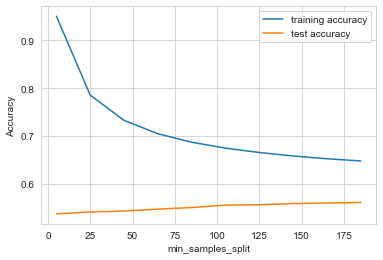

In [43]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


### Grid Search to Find Optimal Hyperparameters

In [54]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 200, 50),
    'min_samples_split': range(50, 200, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1,return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  2.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                      

In [55]:


# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results



mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0           0.546         0.151            0.021           0.002   
1           0.413         0.010            0.020           0.000   
2           0.422         0.034            0.020           0.001   
3           0.497         0.057            0.022           0.001   
4           0.469         0.085            0.021           0.001   
5           0.457         0.058            0.024           0.005   
6           0.451         0.051            0.029           0.009   
7           0.559         0.098            0.027           0.009   
8           0.516         0.120            0.026           0.007   
9           0.758         0.047            0.025           0.005   
10          1.075         0.103            0.035           0.010   
11          0.767         0.112            0.027           0.008   
12          0.773         0.066            0.023           0.004   
13          0.923         0.148            0.023           0.003   
14          0.855         0.225            0.024           0.004   
15          0.939         0.150            0.025           0.006   
16          1.407         0.847            0.035           0.013   
17          1.658         0.519            0.038           0.006   
18          1.277         0.961            0.034           0.021   
19          0.583         0.069            0.032           0.006   
20          0.642         0.124            0.044           0.022   
21          0.428         0.025            0.021           0.001   
22          0.489         0.062            0.024           0.005   
23          0.519         0.058            0.030           0.011   
24          0.731         0.109            0.041           0.020   
25          0.600         0.129            0.025           0.004   
26          0.519         0.080            0.032           0.020   
27          0.774         0.049            0.023           0.002   
28          0.966         0.146            0.028           0.005   
29          0.792         0.170            0.025           0.009   
30          1.059         0.136            0.032           0.012   
31          1.079         0.095            0.028           0.006   
32          0.700         0.027            0.021           0.001   
33          0.679         0.006            0.021           0.001   
34          1.076         0.405            0.025           0.006   
35          0.959         0.196            0.027           0.008   

   param_criterion param_max_depth param_min_samples_leaf  \
0          entropy               5                     50   
1          entropy               5                     50   
2          entropy               5                     50   
3          entropy               5                    100   
4          entropy               5                    100   
5          entropy               5                    100   
6          entropy               5                    150   
7          entropy               5                    150   
8          entropy               5                    150   
9          entropy              10                     50   
10         entropy              10                     50   
11         entropy              10                     50   
12         entropy              10                    100   
13         entropy              10                    100   
14         entropy              10                    100   
15         entropy              10                    150   
16         entropy              10                    150   
17         entropy              10                    150   
18            gini               5                     50   
19            gini               5                     50   
20            gini               5                     50   
21            gini               5                    100   
22            gini               5                    100   
23            gini     

In [56]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.5720041554357592
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=150,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [57]:


# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [58]:
# accuracy score
clf_gini.score(X_test,y_test)

0.5713115828092243

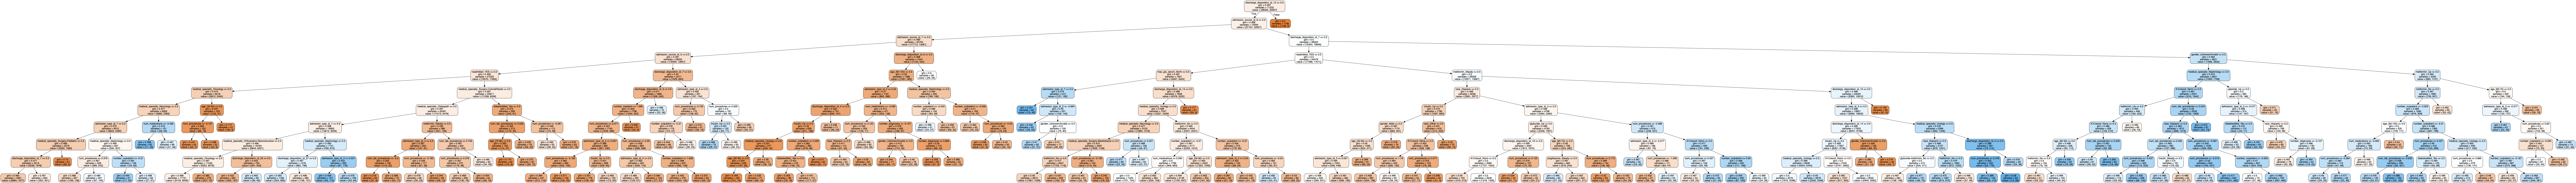

In [59]:
# plotting the tree
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [61]:
# tree with max_depth = 3
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

# score
print(clf_gini.score(X_test,y_test))

0.5528039832285115


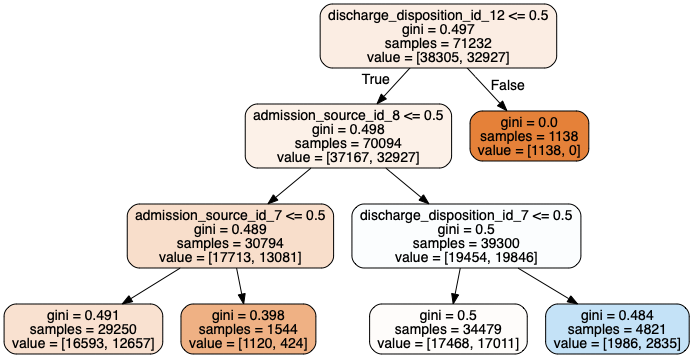

In [62]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [63]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.95      0.70     16553
           1       0.58      0.08      0.15     13975

    accuracy                           0.55     30528
   macro avg       0.57      0.52      0.42     30528
weighted avg       0.56      0.55      0.44     30528



In [64]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))

[[15705   848]
 [12804  1171]]


## KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [43]:
y_pred = classifier.predict(X_test)

In [46]:
knn_pred_prob = classifier.predict_proba(X_test)
knn_pred_prob

array([[0.33333333, 0.66666667],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       ...,
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333]])

In [47]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[9423 7130]
 [7013 6962]]
              precision    recall  f1-score   support

           0       0.57      0.57      0.57     16553
           1       0.49      0.50      0.50     13975

    accuracy                           0.54     30528
   macro avg       0.53      0.53      0.53     30528
weighted avg       0.54      0.54      0.54     30528



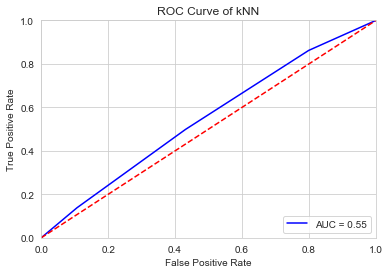

In [48]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


fpr, tpr, threshold = roc_curve(y_test, knn_pred_prob[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

## KNN - Parameter tuning

In [50]:
classifier = KNeighborsClassifier(n_neighbors=3, 
                                  algorithm='kd_tree')

classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [51]:
y_pred = classifier.predict(X_test)

In [52]:
knn_pred_prob = classifier.predict_proba(X_test)
knn_pred_prob

array([[0.33333333, 0.66666667],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       ...,
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333]])

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10351  6215]
 [ 7257  6706]]
              precision    recall  f1-score   support

           0       0.59      0.62      0.61     16566
           1       0.52      0.48      0.50     13963

    accuracy                           0.56     30529
   macro avg       0.55      0.55      0.55     30529
weighted avg       0.56      0.56      0.56     30529



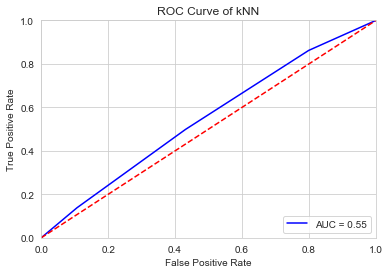

In [53]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


fpr, tpr, threshold = roc_curve(y_test, knn_pred_prob[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

## Chosen Classification Model

#### Decision Tree

Given the domain and the close coordination needed with the Doctors/ Medical personnel, I think it's better to go with a model with higher explicability such that the analysis as well as the Medical Personnel is completely aware of why and how the model arrived at a specific conclusion.

## Population stratification

In [ ]:
# TODO
"""
Use trained model to stratify your population into 3 risk buckets:

- High risk (Probability of readmission >0.7)
- Medium risk (0.3 < Probability of readmission < 0.7)
- Low risk (Probability of readmission < 0.3)
"""

In [56]:
dt_pred_prob

array([[0.62029746, 0.37970254],
       [0.46863469, 0.53136531],
       [0.51388407, 0.48611593],
       ...,
       [0.46863469, 0.53136531],
       [0.57825046, 0.42174954],
       [0.54361294, 0.45638706]])

In [69]:
stratification_array = []

for a_confidence_arr in dt_pred_prob:
    risk = a_confidence_arr[0]
    if  ( risk >= 0.7 ):
        stratification_array.append('High')
    elif ( 0.3 <= risk < 0.7 ):
        stratification_array.append('Medium')
    else:
        stratification_array.append('Low')


In [74]:
X_train.head()

discharge_disposition_id  admission_source_id  time_in_hospital  \
6912                           6                    4            -0.133   
39101                          3                    7             2.547   
101401                         1                    7            -0.133   
56509                          1                    1             0.537   
56563                          1                    7            -0.468   

        num_lab_procedures  num_procedures  num_medications  \
6912                -0.310          -0.785           -0.864   
39101                0.605           0.973           -0.618   
101401              -0.462          -0.785           -0.126   
56509               -0.462          -0.785           -0.987   
56563                0.046          -0.785           -0.126   

        number_outpatient  number_emergency  number_inpatient  \
6912               -0.291            -0.213            -0.503   
39101               0.498            -0.213            -0.503   
101401             -0.291            -0.213             1.872   
56509               2.076            -0.213            -0.503   
56563               0.498            -0.213             1.080   

        number_diagnoses  ...  insulin_Up  glyburide-metformin_No  \
6912              -0.219  ...           1                       1   
39101             -0.736  ...           1                       1   
101401             0.816  ...           0                       1   
56509              0.816  ...           1                       1   
56563             -0.219  ...           0                       1   

        glyburide-metformin_Steady  glyburide-metformin_Up  \
6912                             0                       0   
39101                            0                       0   
101401                           0                       0   
56509                            0                       0   
56563                            0                       0   

        glipizide-metformin_Steady  glimepiride-pioglitazone_Steady  \
6912                             0                                0   
39101                            0                                0   
101401                           0                                0   
56509                            0                                0   
56563                            0                                0   

        metformin-rosiglitazone_Steady  metformin-pioglitazone_Steady  \
6912                                 0                              0   
39101                                0                              0   
101401                               0                              0   
56509                                0                              0   
56563                                0                              0   

        change_No  diabetesMed_Yes  
6912            0                1  
39101           0                1  
101401          0                1  
56509           0                1  
56563           1                0  

[5 rows x 160 columns]

In [72]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71232 entries, 6912 to 38410
Columns: 160 entries, discharge_disposition_id to diabetesMed_Yes
dtypes: float64(8), int64(2), uint8(150)
memory usage: 16.2 MB


In [73]:
len(stratification_array)

71232

In [93]:
# X_train['confidence_YES'] = dt_pred_prob
X_train['confidence_YES'] = stratification_array
X_train

discharge_disposition_id  admission_source_id  time_in_hospital  \
6912                           6                    4            -0.133   
39101                          3                    7             2.547   
101401                         1                    7            -0.133   
56509                          1                    1             0.537   
56563                          1                    7            -0.468   
...                          ...                  ...               ...   
65618                          1                    7            -1.138   
77658                          3                    5             0.537   
79686                          3                    7             1.207   
56090                          1                    7             0.202   
38410                          1                    1            -0.468   

        num_lab_procedures  num_procedures  num_medications  \
6912                -0.310          -0.785           -0.864   
39101                0.605           0.973           -0.618   
101401              -0.462          -0.785           -0.126   
56509               -0.462          -0.785           -0.987   
56563                0.046          -0.785           -0.126   
...                    ...             ...              ...   
65618               -0.005          -0.785           -0.741   
77658                1.266          -0.785            0.489   
79686                0.758           2.732            1.720   
56090                1.012          -0.785           -0.372   
38410                0.198          -0.199            0.120   

        number_outpatient  number_emergency  number_inpatient  \
6912               -0.291            -0.213            -0.503   
39101               0.498            -0.213            -0.503   
101401             -0.291            -0.213             1.872   
56509               2.076            -0.213            -0.503   
56563               0.498            -0.213             1.080   
...                   ...               ...               ...   
65618              -0.291            -0.213             0.289   
77658               1.287             0.862             0.289   
79686               1.287            -0.213             2.664   
56090              -0.291            -0.213            -0.503   
38410               1.287            -0.213            -0.503   

        number_diagnoses  ...  glyburide-metformin_No  \
6912              -0.219  ...                       1   
39101             -0.736  ...                       1   
101401             0.816  ...                       1   
56509              0.816  ...                       1   
56563             -0.219  ...                       1   
...                  ...  ...                     ...   
65618              0.816  ...                       1   
77658              0.816  ...                       1   
79686              0.816  ...                       1   
56090              0.816  ...                       1   
38410             -2.287  ...                       1   

        glyburide-metformin_Steady  glyburide-metformin_Up  \
6912                             0                       0   
39101                            0                       0   
101401                           0                       0   
56509                            0                       0   
56563                            0                       0   
...                            ...                     ...   
65618                            0                       0   
77658                            0                       0   
79686                            0                       0   
56090                            0                       0   
38410                            0                       0   

        glipizide-metformin_Steady  glimepiride-pioglitazone_Steady  \
6912                             0                                0 

In [ ]:
X_train['confidence_YES'].head()